In [ ]:
# # 초기 1회 실행
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Lesson 8-1 Deep Learning1_ann

In [ ]:
## 필요 패키지 설치 및 import
import importlib.util
import subprocess
import sys
def install_and_import(packages):
    for pkg in packages:
        package = pkg
        try:
            importlib.util.find_spec(package)
            print(f"{package} is already installed.")
        except ImportError:
            # 모듈이 설치되어 있지 않은 경우 설치시도
            print(f"{package} is not installed. Installing...")
            subprocess.check_call([sys.executable, "-m", "pip", "install", package])
            subprocess.check_call(["conda", "install", package, "-y"])

            # 설치 후 다시 임포트를 시도
            importlib.import_module(package)
            print(f"{package} has been successfully installed.")

        # finally:
        #     globals()[package] = importlib.import_module(package)
        except Exception as e:
            # 설치 중 예외가 발생한 경우, 에러 메시지를 출력
            print(f"An error occurred while installing {package}: {str(e)}")

# 예시 사용법
# install_and_import(['', ''])


In [ ]:
ppath = '/content/drive/MyDrive/5. STUDY_ETC/Metacode/lesson8'

In [ ]:
## 필요 모듈 임포트
import os, sys, re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from scipy.stats import randint, uniform

# Artificial Neural Network

## 데이터 읽기

In [ ]:
train = pd.read_csv(ppath + '/1. data/secom_nona_train1.csv')
test = pd.read_csv(ppath + '/1. data/secom_nona_test1.csv')

### 데이터 전처리

In [ ]:
## 시간 포맷 변경
train['datetime'] = pd.to_datetime(train['datetime'], format = "%d/%m/%Y %H:%M:%S")
test['datetime'] = pd.to_datetime( test['datetime'], format = "%d/%m/%Y %H:%M:%S")

## 시간 정보 따로 저장
train_time = train['datetime']
test_time = test['datetime']

## train/test 분리
X_train = train.drop(['datetime',  'target'], axis=1)
y_train = train['target']

X_test = test.drop(['datetime', 'target'], axis=1)
y_test = test['target']

In [ ]:
## 데이터 표준화

from sklearn.preprocessing import StandardScaler, OneHotEncoder

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 데이터 확인

In [ ]:
X_train

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_580,x_581,x_582,x_583,x_584,x_585,x_586,x_587,x_588,x_589
0,3068.67,2517.04,2258.2778,2073.0764,1.2329,100.0,96.9478,0.1208,1.3524,0.0020,...,0.00694,138.68936,0.5024,0.0210,0.0045,4.1720,0.0276,0.0160,0.0053,57.7824
1,2995.73,2515.83,2231.6111,2005.8966,1.2969,100.0,93.7522,0.1234,1.4136,0.0129,...,0.00470,183.39280,0.5011,0.0103,0.0027,2.0617,0.0090,0.0166,0.0047,183.3928
2,2953.63,2384.04,2191.2111,1437.5003,2.2073,100.0,97.6444,0.1235,1.3584,-0.0024,...,0.00564,132.99172,0.4968,0.0188,0.0041,3.7853,0.0137,0.0326,0.0108,237.4625
3,3043.70,2535.71,2127.9555,1011.1924,1.0863,100.0,107.1522,0.1261,1.4221,-0.0098,...,0.00460,78.16162,0.4948,0.0124,0.0030,2.5147,0.0215,0.0071,0.0027,33.1090
4,2971.93,2557.58,2189.8778,1158.0925,1.5291,100.0,107.8200,0.1219,1.5361,0.0188,...,0.00460,64.53566,0.4965,0.0217,0.0047,4.3766,0.0419,0.0098,0.0032,23.3852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1326,2929.93,2517.50,2218.8778,1188.2630,1.2557,100.0,100.9444,0.1212,1.5189,-0.0090,...,0.01500,93.51340,0.4999,0.0098,0.0029,1.9702,0.0429,0.0401,0.0150,93.5134
1327,3142.21,2389.91,2223.5333,1352.1869,0.8714,100.0,97.2189,0.1196,1.3465,-0.0054,...,0.00624,60.40976,0.5037,0.0252,0.0056,4.9959,0.0091,0.0169,0.0047,185.8369
1328,3110.23,2397.92,2184.8889,905.1501,1.3378,100.0,106.6900,0.1226,1.4349,0.0062,...,0.00608,316.60016,0.4934,0.0126,0.0030,2.5513,0.0274,0.0072,0.0019,26.1430
1329,3047.19,2524.18,2197.3111,969.8910,1.3015,100.0,105.3911,0.1201,1.5837,-0.0266,...,0.00568,121.25854,0.4967,0.0113,0.0034,2.2808,0.0082,0.0162,0.0054,197.9951


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def custom_confusion_matrix(y_true, y_pred):

        ## 혼동 행렬 계산
        cm = confusion_matrix(y_true=y_true,
                                                          y_pred=y_pred)
        ## 클래스 1을 기준으로 행과 열 순서 변경
        cm = cm[::-1, ::-1]

        ## 행과 열을 바꾸기 위해 전치(transpose)
        cm_transposed = cm.T
        print(cm_transposed)


        # DataFrame으로 변환 (라벨 추가)
        df_cm = pd.DataFrame(cm_transposed,
                                                      index = ['pred 1', 'pred 0'],
                                                      columns = ['act 1', 'act 0'])

        ## 히트맵 그리기
        plt.figure(figsize = (4,3))
        sns.heatmap(df_cm, annot = True, fmt = 'd', cmap = 'Blues')
        plt.title('Confusion Matrix (Class 1 as Positive)')
        plt.ylabel('Predicted')
        plt.xlabel('Actual')
        plt.show()

## 파이토치

- 재현을 위한 랜덤 시드 고정
  - 파이썬 랜덤 시드
  - 넘파이
  - 파이토치
  - GPU사용할 경우, GPU시드

In [ ]:
## 재현을 위한 랜덤 시드 고정...
import random
import numpy as np
import torch

## 시드 고정
random.seed(123)                 # Python 기본 랜덤 시드 고정
np.random.seed(123)           # NumPy 랜덤 시드 고정
torch.manual_seed(123)     # PyTorch CPU 시드 고정

## GPU가 있는 경우 시드 고정, GPU 연산에서 사용되는 난수 생성기의 시드를 고정
if torch.cuda.is_available():
    torch.cuda.manual_seed(123)
    torch.cuda.manual_seed_all(123)  # 모든 GPU에서 시드 고정

## CuDNN 설정 (GPU 사용 시), CuDNN 라이브러리의 비결정적 연산을 방지,  동일한 결과를 얻기 위한 설정..
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

### 파이토치 데이터 형식으로 변환
- df, np.array to **Tensor 형태**

In [ ]:
## PyTorch 데이터셋으로 변환 : Loss function에 따라 바껴야 함
X_train_tensor = torch.FloatTensor(X_train_scaled) # df라면, df.toarray() 필요
y_train_tensor = torch.FloatTensor(y_train.values).unsqueeze(1) # unsqueeze: 형태를 (n_samples, 1)로 변경
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.FloatTensor(y_test.values).unsqueeze(1)

In [ ]:
X_train_tensor.shape, y_train_tensor.shape

(torch.Size([1331, 590]), torch.Size([1331, 1]))

ANN을 클래스로 정의하는 이유
- PyTorch 설계 철학 준수
  - nn.Module을 기반으로 한 객체 지향 방식
  - PyTorch의 다른 기능들과 통합이 쉬움
- 구조화와 캡슐화
  - 신경망의 구조와 동작을 하나의 단위로 묶음
  - 코드의 가독성과 유지보수성 향상
- 자동 미분(Autograd) 기능 활용
  - PyTorch의 자동 역전파 기능과 통합
  - 복잡한 그래디언트 계산 자동화
- 재사용성과 확장성
    - 인스턴스화가 가능해서 동일구조를 여러번 사용 가능
    - 상속을 통한 모델 확장이 용이해짐





### 모델 정의

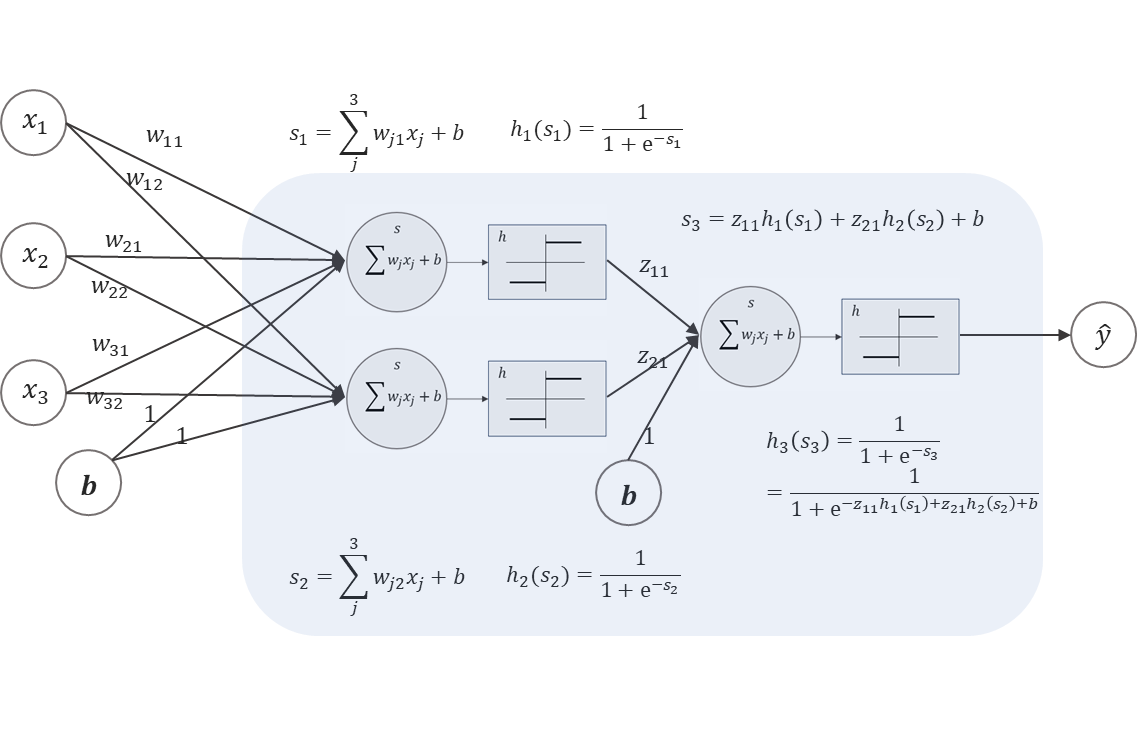

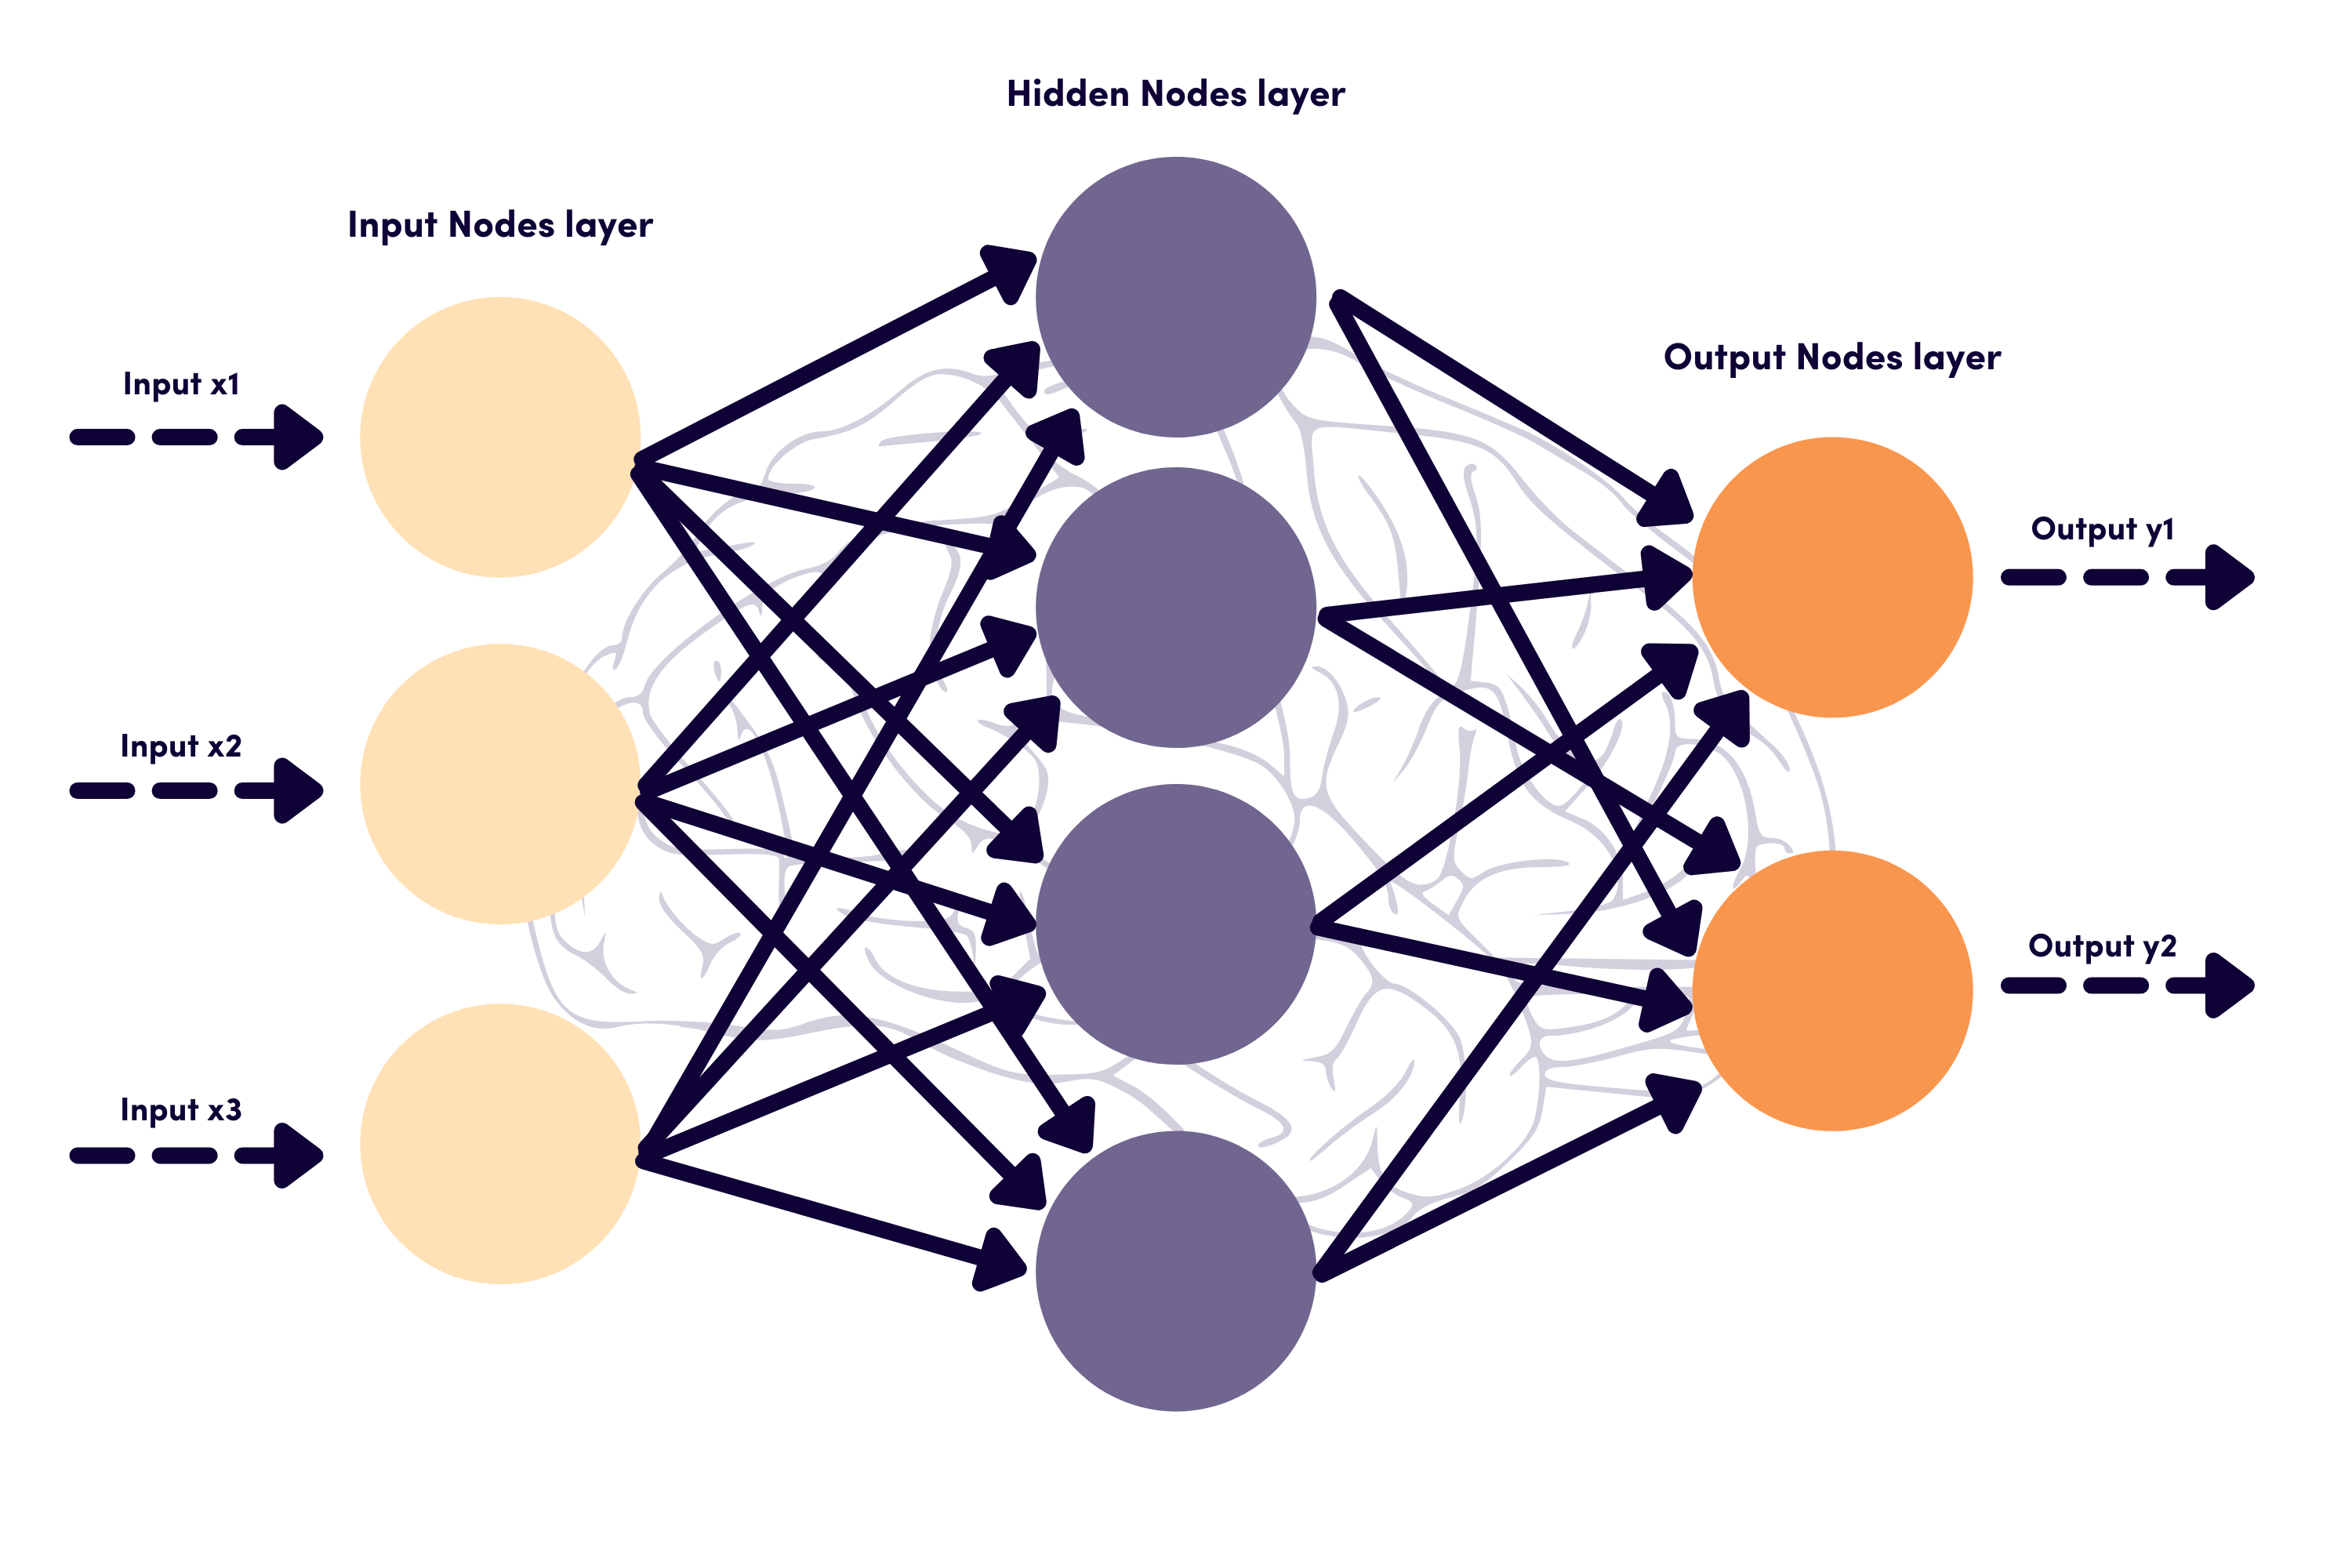

In [ ]:
## ANN 모델 정의
class MLP(nn.Module):
    def __init__(self,
                              input_size: int,
                              hidden_size: int,
                              output_size: int):

        # nn.Module의 __init__ 메서드 호출 (파이토치 기본 기능들 초기화)
        super(MLP,  self).__init__()

        # 입력층에서 히든 레이어로의 완전연결층(Fully Connected Layer)
        self.hidden_layer = nn.Linear(input_size, hidden_size)

        # 히든 레이어의 활성화 함수 (시그모이드)
        self.hidden_activation = nn.Sigmoid()

        # 히든 레이어에서 출력층으로의 완전연결층
        self.output_layer = nn.Linear(hidden_size, output_size)

        # 출력층의 활성화 함수 (시그모이드)
        self.output_activation = nn.Sigmoid()

    def forward(self,
                              x: torch.Tensor) -> torch.Tensor:

        # 입력층 레이어는 생략되어 있음

        # 히든 레이어 통과
        x = self.hidden_layer(x)
        x = self.hidden_activation(x)

        # 출력층 통과
        x = self.output_layer(x)
        x = self.output_activation(x)

        return x

### 모델 초기화

In [ ]:
## 모델 초기화
input_size = X_train_tensor.shape[1]
hidden_size = 64
output_size = 1 # 이진 분류의 경우 한개로 처리, (다진 분류) 클래스3개 분류라면: 3개

model = MLP(input_size, hidden_size, output_size)
model

MLP(
  (hidden_layer): Linear(in_features=590, out_features=64, bias=True)
  (hidden_activation): Sigmoid()
  (output_layer): Linear(in_features=64, out_features=1, bias=True)
  (output_activation): Sigmoid()
)

### 트레이닝 함수 정의

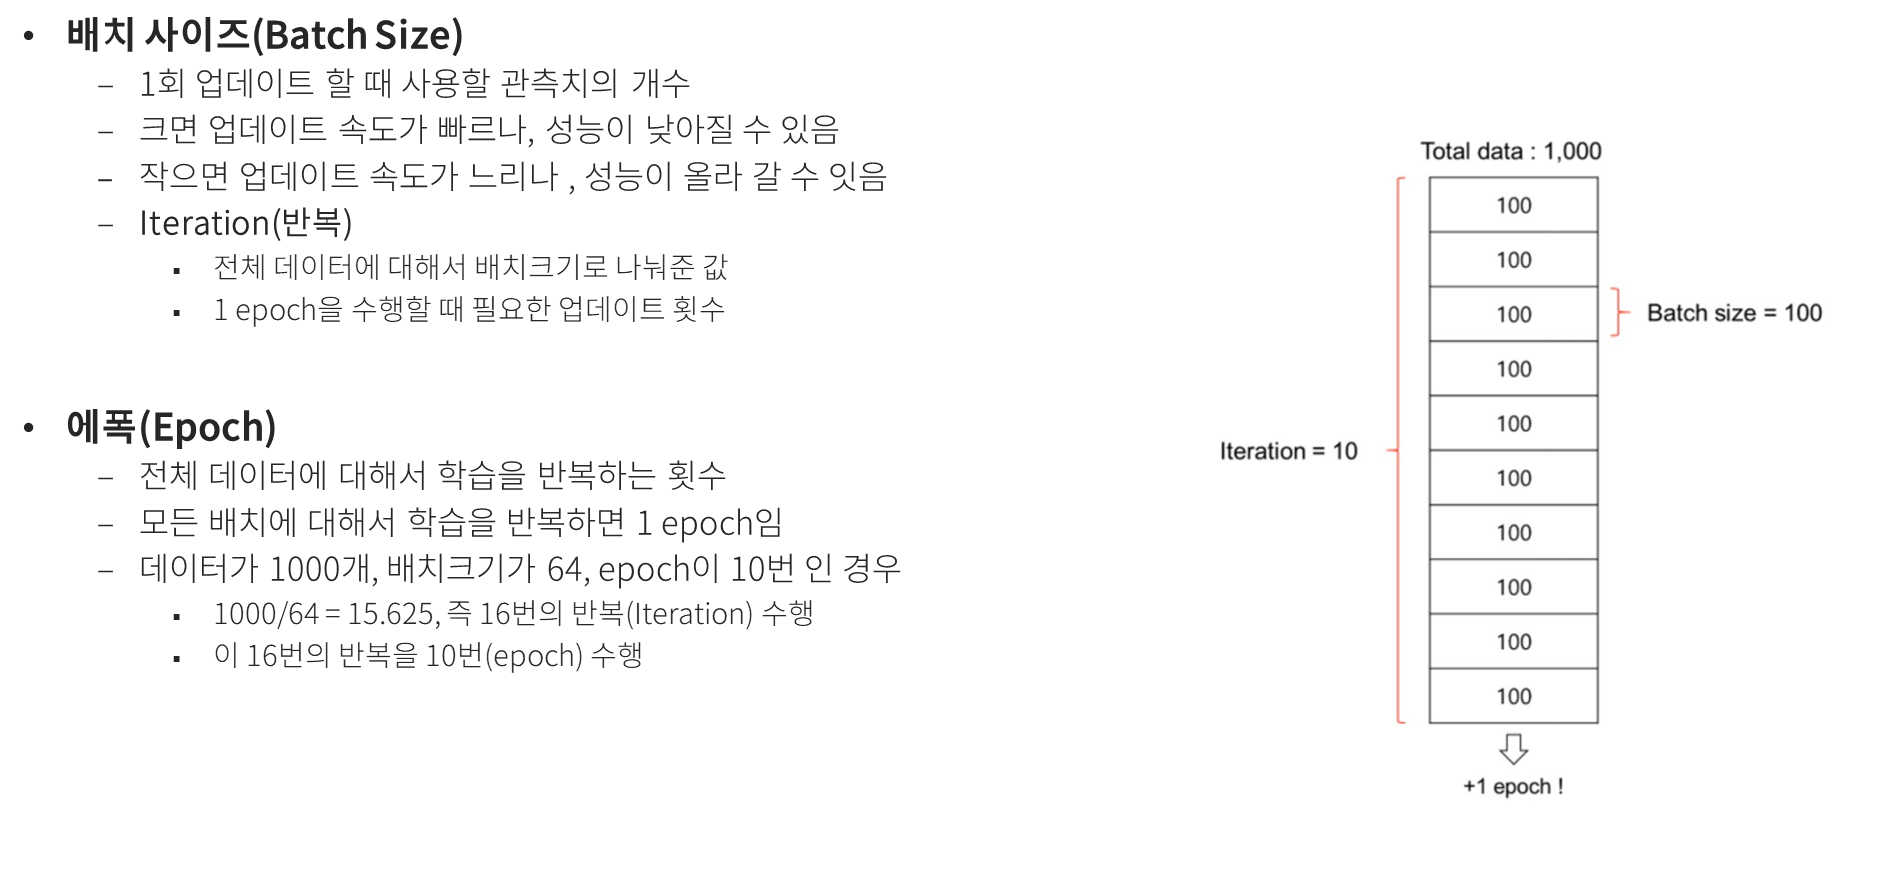

In [ ]:
from torch.utils.data import DataLoader

## 학습 함수 정의
def train_model(model: nn.Module,
                                  train_loader: DataLoader,
                                  criterion: nn.Module,
                                  optimizer: optim.Optimizer,
                                  num_epochs: int):
    loss_history = [] # 에폭에 따른 로스 저장할 리스트 생성

    for epoch in range(num_epochs):      # 각 에폭마다
        model.train()                                            # 모델을 학습모드로 전환
        running_loss = 0.0                                  # 에폭 동안의 누적 손실 초기화

        for inputs, targets in train_loader:  # batch 별로
            ## train loader:  데이터를 배치 단위로 나눠서 학습할 수 있도록 하는 방법, 도구

            # 순전파
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            # 역전파
            optimizer.zero_grad()  # 기존 그래디언트 초기화 (위치는 순전파 이후! 역전파 이전!  손실을 계산한 후, 손실의 기울기를 계산하기 전에 기존의 그래디언트를 초기화..)
            loss.backward()              # 역전파 수행 (자동 미분, auto grad)
            optimizer.step()              # 가중치 업데이트

            running_loss += loss.item()  # 배치 손실 누적     # running_loss = running_loss + loss.item()와 동일

        # 에폭별 평균 손실 계산
        epoch_loss = running_loss / len(train_loader)
        loss_history.append(epoch_loss)  # 에폭별 로스 기록
        print(f'Epoch: [{epoch+1}/{num_epochs}], Loss: {loss.item(): .4f}')

    return loss_history, model # 학습된 모델 반환

### 손실 함수와 옵티마이저 정의


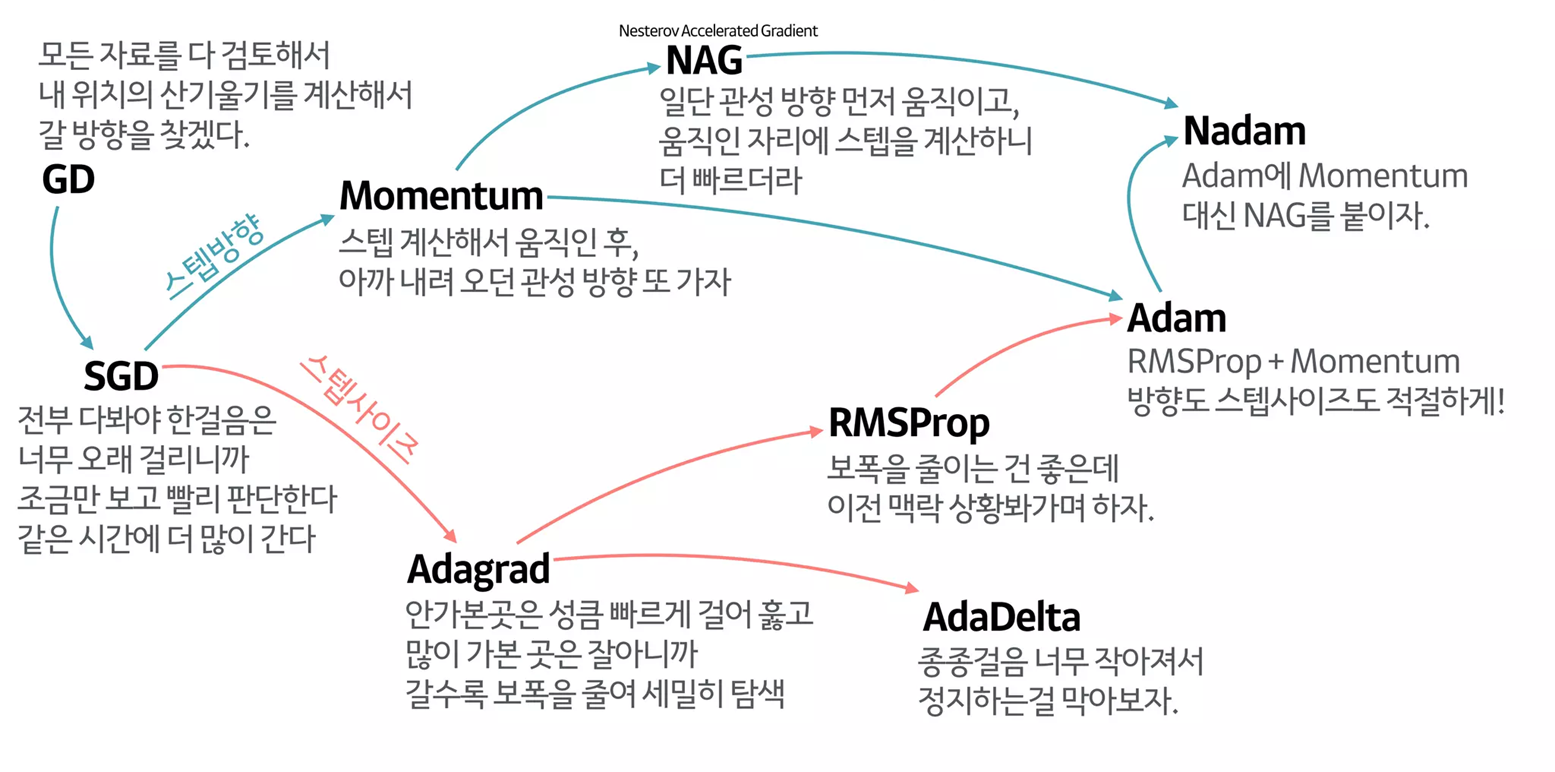

In [ ]:
## 손실 함수
criterion = nn.BCELoss() ##  BCE(Binary Cross Entropy Loss)
# 이진 분류 문제에서 사용,
# 출력값이 이진 값을 가질 때 모델의 예측값과 실제 값 사이의 차이를 측정

# criterion = nn.CrossEntropyLoss() 참고1 참고..

## 옵티마이저
## adam > = Nadam(adam의 약간 개선 버전) == adadelta(메모리 문제있으면)
optimizer = optim.Adam(
        model.parameters(),      # 모델의 학습 가능한 파라미터 전달
        lr = 0.01,                               # learning rate, 파라미터 업데이트의 크기를 결정, 기본값은 0.001
        weight_decay = 0,           # 가중치 감쇠 (L2 규제, weight decay), 기본값은 0
        amsgrad = False               # AMSGrad 알고리즘을 사용할지 여부, 기본값은 False
)
optimizer

# optimizer  =  optim.Adadelta(
#         model.parameters(),     # 모델의 학습 가능한 파라미터를 전달
#         lr = 1.0,                                 # 학습률, 기본값 1.0
#         rho = 0.9,                             # 이전 그래디언트의 제곱을 계산할 때 사용하는감쇠율이며, 기본값은 0.9
#         weight_decay = 0,           # 가중치 감쇠 (L2 규제, weight decay), 기본값은 0
# )

# optimizer = torch.optim.NAdam(
#     model.parameters(),  # 모델의 학습 가능한 파라미터
#     lr = 0.001,                         # 학습률
#     betas = (0.9, 0.999),     # 모멘텀과 적응적 학습률을 위한 하이퍼파라미터 (Adam과 동일)
#     weight_decay = 0         # 가중치 감쇠 (L2 규제), 기본값은 0
# )


Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)

### 데이터 로더
- 데이터를 미니 배치 단위로 나누어 모델에 공급(feed) 하는 방법/도구
- 셔플, 병렬 처리 등을 지원하며, 학습 속도를 최적화할때 필요
- 배치크기 정하기..
  - 보통 2의 승수로 선택 64, 128, 1024 등
  - 왕도가 없음..

In [ ]:
from torch.utils.data import DataLoader, TensorDataset

## 데이터로더 생성
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset,        # 독립, 종속변수
                                                       batch_size = 64,     # 데이터 크기의 0.1 ~ 2% 정도 크기
                                                       shuffle = True,         # 랜덤성 증가
                                                       num_workers = 2) # 멀티쓰레딩, CPU 코어개수.. n_jobs = '-1' 은 오류..주의
train_loader

In [ ]:
## CPU 코어 개수 출력
cpu_cores = os.cpu_count()
cpu_cores

2

### 모델 학습

- 지켜야 할 순서
  - 모델 초기화
  - 가중치 초기화
  - 옵티마이져 초기화



In [ ]:
## 모델 학습
num_epochs = 60

## 재학습시에는 모델 + 옵티마이져 초기화 를 꼭 해줘야 함!!!!
# model = MLP(input_size, hidden_size, output_size)
# optimizer = optim.Adam(
#         model.parameters(),      # 모델의 학습 가능한 파라미터 전달
#         lr = 0.01,                               # learning rate, 파라미터 업데이트의 크기를 결정, 기본값은 0.001
#         weight_decay = 0,           # 가중치 감쇠 (L2 규제, weight decay), 기본값은 0
#         amsgrad = False               # AMSGrad 알고리즘을 사용할지 여부, 기본값은 False
# )
## 그렇지 않으면 이전 학습에서 이미 학습한 가중치를 기반으로 계속 업데이트하게됨...이상한 결과가 나올 수 있다..


loss_history, trained_model = train_model(model = model,
                                                                                         train_loader = train_loader,
                                                                                         criterion = criterion,
                                                                                         optimizer = optimizer,
                                                                                         num_epochs = num_epochs)
loss_history, trained_model

Epoch: [1/60], Loss:  0.0040
Epoch: [2/60], Loss:  0.0021
Epoch: [3/60], Loss:  0.0107
Epoch: [4/60], Loss:  0.0009
Epoch: [5/60], Loss:  0.0065
Epoch: [6/60], Loss:  0.0072
Epoch: [7/60], Loss:  0.0006
Epoch: [8/60], Loss:  0.0036
Epoch: [9/60], Loss:  0.0004
Epoch: [10/60], Loss:  0.0107
Epoch: [11/60], Loss:  0.0036
Epoch: [12/60], Loss:  0.0185
Epoch: [13/60], Loss:  0.0073
Epoch: [14/60], Loss:  0.0032
Epoch: [15/60], Loss:  0.0051
Epoch: [16/60], Loss:  0.0004
Epoch: [17/60], Loss:  0.0011
Epoch: [18/60], Loss:  0.0003
Epoch: [19/60], Loss:  0.0007
Epoch: [20/60], Loss:  0.0009
Epoch: [21/60], Loss:  0.0007
Epoch: [22/60], Loss:  0.0040
Epoch: [23/60], Loss:  0.0080
Epoch: [24/60], Loss:  0.0016
Epoch: [25/60], Loss:  0.0008
Epoch: [26/60], Loss:  0.0002
Epoch: [27/60], Loss:  0.0006
Epoch: [28/60], Loss:  0.0092
Epoch: [29/60], Loss:  0.0098
Epoch: [30/60], Loss:  0.0067
Epoch: [31/60], Loss:  0.0003
Epoch: [32/60], Loss:  0.0081
Epoch: [33/60], Loss:  0.0012
Epoch: [34/60], Los

([0.006376714878050345,
  0.00613848862537582,
  0.00605690429663463,
  0.005775591978038262,
  0.005645570433920338,
  0.005506648396563139,
  0.0052810850458973576,
  0.005107937149226754,
  0.004982361266489274,
  0.004938210892890181,
  0.004747707786182651,
  0.0052464535859014306,
  0.004869737329759768,
  0.004698079439722711,
  0.004629282508089784,
  0.004353798590489619,
  0.004313044200119164,
  0.004135832854358125,
  0.0040936291819283115,
  0.004015010234156978,
  0.004297458045628099,
  0.003831398213237879,
  0.004063331680732691,
  0.003762277295685462,
  0.0036687469553379785,
  0.003595090792043179,
  0.003558074171277916,
  0.0036881847038222034,
  0.0035603675260929214,
  0.003530572622410199,
  0.0035201123689711537,
  0.0036119357045252052,
  0.003317871755349361,
  0.0032505077036884835,
  0.0031434203764157636,
  0.003128086114191406,
  0.0030910734245221,
  0.0030842869489875043,
  0.0031565618316692834,
  0.0029694148342102942,
  0.002995255090008002,
  0.002

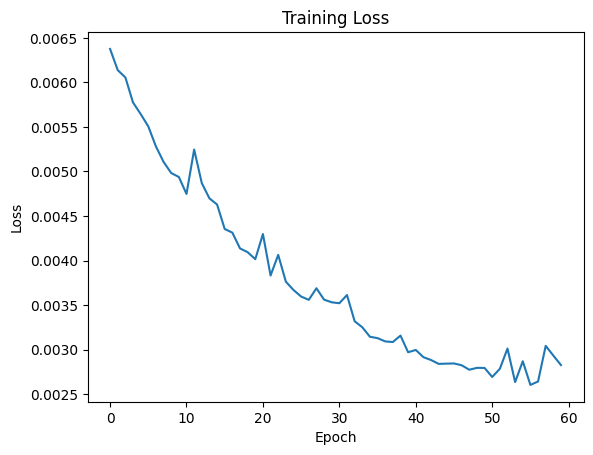

In [ ]:
## 에폭~Loss 그래프 그리기
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

## 테스트데이터에 적용

Test Accuracy: 0.9237
[[  3   5]
 [ 13 215]]


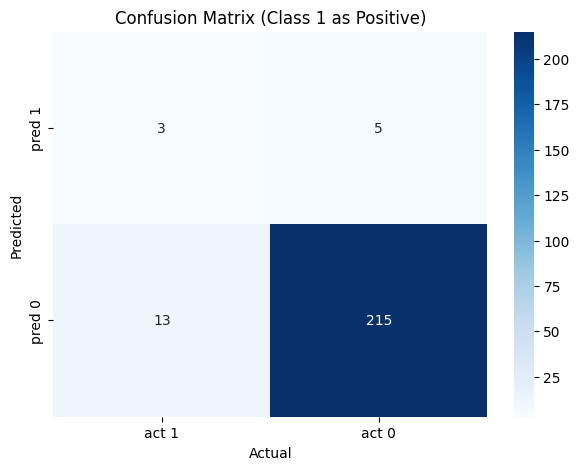


Classification Report:
              precision    recall  f1-score   support

           0     0.9430    0.9773    0.9598       220
           1     0.3750    0.1875    0.2500        16

    accuracy                         0.9237       236
   macro avg     0.6590    0.5824    0.6049       236
weighted avg     0.9045    0.9237    0.9117       236



In [ ]:
## 모델 Inference, (모델 평가라고 부르기도..)
trained_model.eval() # 평가모드로 전환

## 그레디언트 계산 비 활성화 후 계산만..
with torch.no_grad(): # with문: 특정 코드 블록의 실행 전후에 특별한 동작을 정의

    # 모델 예측
    y_pred = trained_model(X_test_tensor)

    # 확률 값을 클래스 값으로 변경
    y_pred_class = (y_pred > 0.5).float() # 0.5보다 크면 1로 변환, 아니면 0

    # 정확도 계산
    accuracy = accuracy_score(y_test, y_pred_class)
    print(f'Test Accuracy: {accuracy:.4f}')

    custom_confusion_matrix(y_test, y_pred_class)

    print('\nClassification Report:')
    print(classification_report(y_test, y_pred_class, digits = 4))

## 참고
- 파라미터 갯수 , 가중치 출력하기
- 변수 중요도 계산

### 파라미터 갯수 , 가중치 출력하기

In [ ]:
## 파라미터 개수를 계산하는 함수 정의
def count_parameters(model):
    # 모델의 학습 가능한 파라미터 중, 각각의 파라미터의 요소 개수를 모두 더하기
    params = [param.numel() for param in model.parameters() if param.requires_grad]
    output = sum(params)

    return output

## 모델의 총 학습 가능한 파라미터 수를 계산하여 출력
total_params = count_parameters(trained_model)
print('Total parameters:' , total_params )

Total parameters: 37889


In [ ]:
## 모델의 가중치와 편향을 출력하고, 각 레이어별 파라미터 정보를 출력하는 코드
for name, params in trained_model.named_parameters(): # 모델의 모든 파라미터를 이름과 함께 반환..

    if params.requires_grad:  # 파라미터가 학습 가능한 경우 (requires_grad=True)
        # 레이어 이름, 파라미터의 크기(모양), 파라미터 값 일부를 출력
        print(f'Layer: {name} \n | Size: {params.size()} \n | Values : {params[:2]}\n')


Layer: hidden_layer.weight 
 | Size: torch.Size([64, 590]) 
 | Values : tensor([[ 0.0183, -0.0066,  0.0875,  ..., -0.2016, -0.3328,  0.1481],
        [ 0.1654, -0.0488, -0.0840,  ..., -0.0631, -0.0175,  0.1526]],
       grad_fn=<SliceBackward0>)

Layer: hidden_layer.bias 
 | Size: torch.Size([64]) 
 | Values : tensor([-0.1091,  0.2442], grad_fn=<SliceBackward0>)

Layer: output_layer.weight 
 | Size: torch.Size([1, 64]) 
 | Values : tensor([[-0.2523, -0.3325, -0.7115, -0.5941, -0.8288, -1.1504, -0.6036, -0.7689,
         -0.6100,  0.9852, -0.6476, -0.3026, -0.5424, -0.7193, -0.6851, -0.6153,
         -0.1744,  0.7361, -0.7238, -0.3777, -0.6544, -0.2829, -1.0257, -0.4676,
         -0.5727, -0.7577, -0.4832, -0.2471, -0.4376, -0.3279, -0.1944, -0.7592,
          1.1896, -0.6174, -0.5184, -0.3035, -0.2257, -0.3252, -0.3345, -0.6427,
          1.1112, -0.7402, -1.0519, -0.4582, -0.4777, -0.5992,  0.6826, -0.4792,
         -0.6368,  0.7096, -0.2807, -0.1853, -0.8667,  1.0198,  1.1986, -0.612

### 변수 중요도 계산하기

1. Weight calculation
  - 입력층과 첫 번째 은닉층 사이의 가중치를 사용하여 변수의 중요도를 추정
  - 계산이 빠르고 간단함
  - 변수간 상호작용을 고려하지 않음
2. Permutation
  - 퍼뮤테이션을 사용하여(특정 변수만 랜덤하게 섞기), 모델의 성능변화로 변수 중요도 추정
  - 모델 상관없이 적용 가능
  - 특성 간 상호작용을 다소.. 고려함
  - 계산 비용이 높을 수 있음
3. SHAP (SHapley Additive exPlanations)
  - 게임 이론을 기반으로 각 특성의 기여도를 계산
  - 매우 정확하고 해석 가능한 결과 제공, 특성 간 상호작용을 잘 고려함
  - 계산 비용이 매우 높음, 구현이 복잡할 수 있음

- 1번을 제외하고, 원핫인코딩을 사용할 경우에, 범주형변수가 너무 많으면 2,3번 방법은 sparse matrix를 처리해줘야 할 수 있음.....


In [ ]:
def calculate_weight_importance(model):
    # 입력층과 첫 번째 은닉층 사이의 가중치 추출
    weights = model.hidden_layer.weight.data.abs().numpy()

    # 각 입력 변수에 대한 가중치의 평균 계산
    importance = np.mean(weights, axis=0)

    # 중요도를 0-1 사이로 정규화
    importance = (importance - np.min(importance)) / (np.max(importance) - np.min(importance))

    return importance

# 사용 예
importance_scores = calculate_weight_importance(trained_model)
for i, score in enumerate(importance_scores):
    print(f"X_{i}: {score}")

X_0: 0.23498442769050598
X_1: 0.18128196895122528
X_2: 0.14104634523391724
X_3: 0.2591714859008789
X_4: 0.12614129483699799
X_5: 0.005273435264825821
X_6: 0.2239183634519577
X_7: 0.15369386970996857
X_8: 0.40140751004219055
X_9: 0.504339873790741
X_10: 0.262041300535202
X_11: 0.19924072921276093
X_12: 0.3073761463165283
X_13: 0.00048074903315864503
X_14: 0.4638567864894867
X_15: 0.42703402042388916
X_16: 0.4128548502922058
X_17: 0.33258697390556335
X_18: 0.3545256555080414
X_19: 0.3495558500289917
X_20: 0.3485080599784851
X_21: 0.3251979649066925
X_22: 0.35651910305023193
X_23: 0.26601943373680115
X_24: 0.302062064409256
X_25: 0.2300698608160019
X_26: 0.2210490107536316
X_27: 0.21248121559619904
X_28: 0.34997305274009705
X_29: 0.29649481177330017
X_30: 0.27050596475601196
X_31: 0.3105558454990387
X_32: 0.22043152153491974
X_33: 0.28199952840805054
X_34: 0.1540006846189499
X_35: 0.26093363761901855
X_36: 0.15476961433887482
X_37: 0.2243890017271042
X_38: 0.31605520844459534
X_39: 0.3386

In [ ]:
## 변수 이름 설정
feature_names = ["X_" + str(i)  for i in range(X_test_tensor.shape[1])]

## 중요도를 기준으로 내림차순 정렬한 인덱스 가져오기
sorted_indices = np.argsort(importance_scores)[::-1]  # 내림차순 정렬

## 상위 10개 중요도 출력
print("상위 10 중요변수")
for idx in sorted_indices[:10]:
    print(f"{feature_names[idx]}: {importance_scores[idx]}")

## 하위 5개 중요도 출력
print("\n 하위 5개 변수:")
for idx in sorted_indices[-5:]:
    print(f"{feature_names[idx]}: {importance_scores[idx]}")

상위 10 중요변수
X_425: 1.0
X_205: 0.8537994027137756
X_117: 0.8469340801239014
X_477: 0.8156014084815979
X_129: 0.7866064310073853
X_56: 0.7783890962600708
X_341: 0.7471031546592712
X_152: 0.7242469787597656
X_59: 0.7046023607254028
X_132: 0.6960737705230713

 하위 5개 변수:
X_531: 0.0007818498415872455
X_514: 0.0006751421024091542
X_13: 0.00048074903315864503
X_513: 0.00042455625953152776
X_237: 0.0


## 하이퍼파라미터 최적화

#### 그리드 서치

In [ ]:
## 평가 함수
def evaluate_model(model, X_test, y_test):
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test)
        y_pred_class = (y_pred > 0.5).float()
        accuracy = accuracy_score(y_test.numpy(), y_pred_class.numpy())
    return accuracy

## 하이퍼파라미터 튜닝
hidden_sizes = [32, 64, 128]
learning_rates = [0.001, 0.01, 0.1]
batch_sizes = [32, 64, 128]
epochs_list = [5, 20, 30]

output_size = 1

best_accuracy = 0
best_params = {}

for hidden_size in hidden_sizes:
    for lr in learning_rates:
        for batch_size in batch_sizes:
            for epochs in epochs_list:
                # 모델 초기화
                model = MLP(input_size = X_train_tensor.shape[1],
                                            hidden_size = hidden_size,
                                            output_size  =  output_size)

                # 데이터 로더 설정
                train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
                train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

                # 손실 함수와 옵티마이저 설정
                criterion = nn.BCELoss()
                optimizer = optim.Adam(model.parameters(), lr=lr)

                # 모델 학습
                loss_history, trained_model = train_model(model,
                                                                        train_loader,
                                                                        criterion,
                                                                        optimizer,
                                                                        epochs)

                # 모델 평가
                accuracy = evaluate_model(trained_model, X_test_tensor, y_test_tensor)
                print("accuracy:", accuracy, "\n")

                # 최고 성능 모델 저장
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_params = {
                        'hidden_size': hidden_size,
                        'learning_rate': lr,
                        'batch_size': batch_size,
                        'epochs': epochs
                    }

                    best_model = trained_model

print("Best parameters:", best_params)
print("Best accuracy:", best_accuracy)
print("Best model:", best_model)

#### 랜덤서치

- 랜덤 서치
  - GridSearch(CV)보다 효율적
  - 더 넓은 파라미터 공간을 탐색 할 수 있어서, 최적값을 찾을 확률이 다소 더 높음..

In [ ]:
## 평가 함수(그리드 서치와 동일)
def evaluate_model(model, X_test, y_test):
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test)
        y_pred_class = (y_pred > 0.5).float()
        accuracy = accuracy_score(y_test.numpy(), y_pred_class.numpy())
    return accuracy
## 하이퍼파라미터 튜닝 (동일)

## 랜덤 하이퍼파라미터 생성 함수
def get_random_hyperparameters():
    return {
        'hidden_size': random.randint(10, 100),
        'learning_rate': random.choice([0.001, 0.01, 0.1]),
        'batch_size': random.choice([32, 64, 128]),
        'epochs': random.randint(10, 50)
    }

## 랜덤 서치 하이퍼파라미터 튜닝
n_iter = 20  # 랜덤 서치 반복 횟수
best_accuracy = 0
best_params = {}
best_model = None

for _ in range(n_iter):
    # 랜덤 하이퍼파라미터 선택
    params = get_random_hyperparameters()

    # 모델 초기화
    model = MLP(input_size, params['hidden_size'], output_size)

    # 손실 함수와 옵티마이저 정의
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=params['learning_rate'])

    # 데이터 로더 생성
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=params['batch_size'], shuffle=True)

    # 모델 훈련
    loss_history, model = train_model(model, train_loader, criterion, optimizer, params['epochs'])

    # 모델 평가
    accuracy = evaluate_model(model, X_test_tensor, y_test_tensor)
    print("accuracy:", accuracy, "\n")

    # 최고 성능 모델 저장
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params
        best_model = model


Epoch: [1/19], Loss:  0.5115
Epoch: [2/19], Loss:  0.4510
Epoch: [3/19], Loss:  0.4302
Epoch: [4/19], Loss:  0.4418
Epoch: [5/19], Loss:  0.3610
Epoch: [6/19], Loss:  0.3788
Epoch: [7/19], Loss:  0.3411
Epoch: [8/19], Loss:  0.2905
Epoch: [9/19], Loss:  0.3091
Epoch: [10/19], Loss:  0.3138
Epoch: [11/19], Loss:  0.2841
Epoch: [12/19], Loss:  0.3111
Epoch: [13/19], Loss:  0.2120
Epoch: [14/19], Loss:  0.2398
Epoch: [15/19], Loss:  0.2714
Epoch: [16/19], Loss:  0.2138
Epoch: [17/19], Loss:  0.1400
Epoch: [18/19], Loss:  0.2587
Epoch: [19/19], Loss:  0.2010
accuracy: 0.9322033898305084 

Epoch: [1/37], Loss:  0.7029
Epoch: [2/37], Loss:  0.5839
Epoch: [3/37], Loss:  0.4834
Epoch: [4/37], Loss:  0.4254
Epoch: [5/37], Loss:  0.3251
Epoch: [6/37], Loss:  0.2950
Epoch: [7/37], Loss:  0.2122
Epoch: [8/37], Loss:  0.2604
Epoch: [9/37], Loss:  0.2573
Epoch: [10/37], Loss:  0.2215
Epoch: [11/37], Loss:  0.1831
Epoch: [12/37], Loss:  0.2982
Epoch: [13/37], Loss:  0.2163
Epoch: [14/37], Loss:  0.27

In [ ]:
## 최적 모델 결과
print("Best parameters:", best_params)
print("Best accuracy:", best_accuracy)
print("Best model:", best_model)

Best parameters: {'hidden_size': 14, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 43}
Best accuracy: 0.9364406779661016
Best model: MLP(
  (hidden_layer): Linear(in_features=590, out_features=14, bias=True)
  (hidden_activation): Sigmoid()
  (output_layer): Linear(in_features=14, out_features=1, bias=True)
  (output_activation): Sigmoid()
)


### 최적화 모델의 결과 확인

Test Accuracy: 0.9364
[[  4   3]
 [ 12 217]]


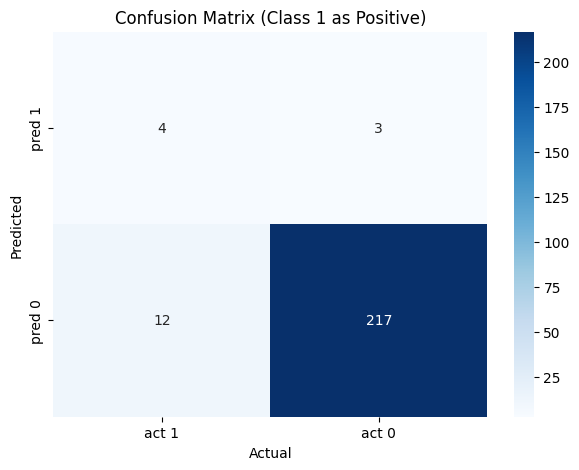


Classification Report:
              precision    recall  f1-score   support

           0     0.9476    0.9864    0.9666       220
           1     0.5714    0.2500    0.3478        16

    accuracy                         0.9364       236
   macro avg     0.7595    0.6182    0.6572       236
weighted avg     0.9221    0.9364    0.9246       236



In [ ]:
## 모델 Inference, (모델 평가라고 부르기도..)
best_model.eval()  # 평가모드로 전환

## 그레디언트 계산 비 활성화 후 계산만..
with torch.no_grad(): # 특정 코드 블록의 실행 전후에 특별한 동작을 정의

    # 모델 예측
    y_pred = best_model(X_test_tensor)

    # 확률 값을 클래스 값으로 변경
    y_pred_class = (y_pred > 0.5).float() # 0.5보다 크면 1로 변환, 아니면 0

    # 정확도 계산
    accuracy = accuracy_score(y_test, y_pred_class)
    print(f'Test Accuracy: {accuracy:.4f}')

    custom_confusion_matrix(y_test, y_pred_class)

    print('\nClassification Report:')
    print(classification_report(y_test, y_pred_class, digits = 4))

In [ ]:
# EOS

## 참고1: 다른 loss 사용
- CrossEntropyLoss를 사용,
- output_size = 클래수의 수 만큼 변경
- 차원 변경에 주의 할것...


In [ ]:
## PyTorch 데이터셋으로 변환
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.LongTensor(y_train.values)  # CrossEntropyLoss는 정수형 레이블을 사용하므로 LongTensor 필요!!!!
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.LongTensor(y_test.values)


## 데이터로더 생성
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset,
                                                       batch_size = 64,
                                                       shuffle = True)

# ANN 모델 정의 (CrossEntropyLoss 사용을 위한 수정)
class MLP_ce(nn.Module):
    def __init__(self, input_size: int, hidden_size: int, output_size: int):
        super(MLP_ce, self).__init__()

        # 입력층에서 히든 레이어로의 완전연결층
        self.hidden_layer = nn.Linear(input_size, hidden_size)
        self.hidden_activation = nn.Sigmoid()  # 히든 레이어의 활성화 함수

        # 히든 레이어에서 출력층으로의 완전연결층
        self.output_layer = nn.Linear(hidden_size, output_size)
        # 출력층의 활성화 함수는 없음 (CrossEntropyLoss가 내부적으로 softmax를 처리)!!!

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # 히든 레이어 통과
        x = self.hidden_layer(x)
        x = self.hidden_activation(x)

        # 출력층 통과 (Softmax는 CrossEntropyLoss에서 자동 처리됨!!!)
        x = self.output_layer(x)

        return x

# 모델 초기화
input_size = X_train_tensor.shape[1]
hidden_size = 64
output_size = 2  # CrossEntropyLoss를 사용할 경우, 클래스 수만큼 설정!!! (이진 분류의 경우 2)

model = MLP_ce(input_size, hidden_size, output_size)

## 손실 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss()  # CrossEntropyLoss 사용 !!!
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 타겟을 레이블로 변경!!! (원-핫 인코딩이 아님)
y_train_tensor = torch.LongTensor(y_train.values)  # CrossEntropyLoss는 LongTensor 필요
y_test_tensor = torch.LongTensor(y_test.values)

## 모델 학습
num_epochs = 30

loss_history, trained_model = train_model(model = model,
                                                                          train_loader = train_loader,
                                                                          criterion = criterion,
                                                                          optimizer = optimizer,
                                                                          num_epochs = num_epochs)
loss_history, trained_model

## 모델 평가 부분도 동일하게 수정
trained_model.eval()
with torch.no_grad():
    # 모델 예측
    y_pred = trained_model(X_test_tensor)

    # CrossEntropyLoss를 사용할 경우, argmax로 가장 높은 값을 가진 클래스 선택 (0 또는 1)
    y_pred_class = torch.argmax(y_pred, dim=1)

    # y_pred_class와 y_test_tensor가 같은 형식인지 확인
    print(f'y_pred_class shape: {y_pred_class.shape}, y_test_tensor shape: {y_test_tensor.shape}')

    # 정확도 계산
    accuracy = accuracy_score(y_test_tensor, y_pred_class)
    print(f'Test Accuracy: {accuracy:.4f}')

    custom_confusion_matrix(y_test, y_pred_class)


    print('\nClassification Report:')
    print(classification_report(y_test_tensor, y_pred_class))

## 참고2: 회귀문제로 변경
- output_size = 1
- loss function을 회귀문제로 변경
- y 종속변수의 tensor type을 FloatTensor로 변경
- 평가 지표를 MSE로 변경

In [ ]:
wine = pd.read_csv(ppath + '/1. data/wine.csv')
wine

In [ ]:
wine = wine.drop('Class', axis = 1)
wine

In [ ]:
from sklearn.model_selection import train_test_split

## 종속변수(y)를 Alcohol로 설정
y = wine['Alcohol']
X = wine.drop('Alcohol', axis=1)

## 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler

## 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

## PyTorch 데이터셋으로 변환
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train.values)  # 회귀 문제이므로 FloatTensor 사용
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.FloatTensor(y_test.values)    # 회귀 문제이므로 FloatTensor 사용

## 데이터로더 생성
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# ANN 모델 정의 (회귀 문제를 위한 수정)
class MLP_reg(nn.Module):
    def __init__(self, input_size: int, hidden_size: int, output_size: int):
        super(MLP_reg, self).__init__()

        # 입력층에서 히든 레이어로의 완전연결층
        self.hidden_layer = nn.Linear(input_size, hidden_size)
        self.hidden_activation = nn.ReLU()  # ReLU 활성화 함수 사용 (Sigmoid 대신 ReLU 추천)

        # 히든 레이어에서 출력층으로의 완전연결층
        self.output_layer = nn.Linear(hidden_size, output_size)
        # 회귀 문제이므로 출력층에서 활성화 함수는 없음

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # 히든 레이어 통과
        x = self.hidden_layer(x)
        x = self.hidden_activation(x)

        # 출력층 통과
        x = self.output_layer(x)

        return x

# 모델 초기화
input_size = X_train_tensor.shape[1]
hidden_size = 64
output_size = 1  # 회귀 문제이므로 출력 크기는 1

model = MLP_reg(input_size, hidden_size, output_size)

## 손실 함수와 옵티마이저 정의
criterion = nn.MSELoss()  # MSELoss 사용 (회귀 문제용 손실 함수)
optimizer = optim.Adam(model.parameters(), lr=0.001)

## 모델 학습 함수 정의
def train_model(model, train_loader, criterion, optimizer, num_epochs):
    loss_history = []
    for epoch in range(num_epochs):
        model.train()  # 학습 모드
        running_loss = 0.0
        for inputs, targets in train_loader:
            optimizer.zero_grad()  # 이전 배치의 그래디언트 초기화
            outputs = model(inputs)  # 모델 순전파
            loss = criterion(outputs, targets)  # 손실 계산
            loss.backward()  # 역전파
            optimizer.step()  # 옵티마이저로 가중치 업데이트
            running_loss += loss.item()

        epoch_loss = running_loss / len(train_loader)
        loss_history.append(epoch_loss)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')

    return loss_history, model

## 모델 학습
num_epochs = 30

loss_history, trained_model = train_model(model=model,
                                          train_loader=train_loader,
                                          criterion=criterion,
                                          optimizer=optimizer,
                                          num_epochs=num_epochs)

## 모델 평가
trained_model.eval()  # 평가 모드
with torch.no_grad():
    # 모델 예측
    y_pred = trained_model(X_test_tensor)

    # y_pred와 y_test_tensor가 같은 형식인지 확인
    print(f'y_pred shape: {y_pred.shape}, y_test_tensor shape: {y_test_tensor.shape}')

    # 회귀 문제에서는 argmax 대신 그대로 사용하여 MSE 계산
    mse = mean_squared_error(y_test_tensor.numpy(), y_pred.numpy())

    print(f'Test Mean Squared Error: {mse:.4f}')